In [41]:
# Usei como base esse tutorial:
# https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb#scrollTo=f-OHX4DiXd8x

In [42]:
# # # Clear logs
# # %rm -rf ./logs/

# # Ativação do Tensorboard
%conda activate pystock
%load_ext tensorboard

# # Reload Tensorboar
%reload_ext tensorboard



Note: you may need to restart the kernel to use updated packages.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [43]:
# # Reload Tensorboar
%reload_ext tensorboard


# Sequential model

*Dense model 16*
*Dense model 16*
*Dense model 8*
*Dense model 4*
*Epoch 350*

_MSE: 1.31_
epoch: 350

Activation: softplus
Optimizer: Adam

15/15 - 0s - loss: 0.6325 - mae: 0.5830 - mse: 0.6325
Testing set Mean Abs Error:  0.58 ibova_0

In [44]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers

# Lendo Dfs

In [45]:
PATH_TREINO = '../Data/3_Gold/Treino_all_stocks.csv'
DF_TREINO = pd.read_csv(PATH_TREINO, sep=",")

PATH_VALIDACAO = '../Data/3_Gold/Validacao_all_stocks.csv'
DF_VALIDACAO = pd.read_csv(PATH_VALIDACAO, sep=",")

PATH_TESTE = '../Data/3_Gold/Teste_all_stocks.csv'
DF_TESTE = pd.read_csv(PATH_TESTE, sep=",")

In [46]:
# index,
# ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,
# oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,
# usd_1,usd_2,usd_3,usd_4,usd_5,
# abev_0,abev_1,abev_2,abev_3,abev_4,abev_5,
# jbs_0,jbs_1,jbs_2,jbs_3,jbs_4,jbs_5,
# petr_0,petr_1,petr_2,petr_3,petr_4,petr_5,
# vale_0,vale_1,vale_2,vale_3,vale_4,vale_5

In [47]:
# 60%
train_dataset = DF_TREINO
train_dataset = train_dataset.drop(['oil_5','usd_5','abev_5','jbs_5','petr_5','vale_5',], axis=1)
train_labels = train_dataset.pop('ibova_5')

# 20%
test_dataset = DF_TESTE
test_dataset = test_dataset.drop(['oil_5','usd_5','abev_5','jbs_5','petr_5','vale_5',],axis=1)
test_labels = test_dataset.pop('ibova_5')

# 20%
valid_dataset = DF_VALIDACAO
valid_dataset = valid_dataset.drop(['ibova_5','oil_5','usd_5','abev_5','jbs_5','petr_5','vale_5',],axis=1)
# valid_labels = valid_dataset.pop('ibova_5')

# Inspecionando os dados

In [48]:
# sns.pairplot(train_dataset[['index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4']], diag_kind="kde")
# sns.pairplot(train_dataset[['index','ibova_0','oil_0','usd_0']], diag_kind="kde")
# sns.pairplot(train_dataset[['ibova_1','oil_1','usd_1']], diag_kind="kde")

In [49]:
train_stats = train_dataset.describe()
# train_stats

# Definindo o modelo

#TODO:

Definir um range para a definição dos hyper parametros do modelo

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
	hyper parameter optimizers

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

A biblioteca vai encontrar os melhores parametros no conjunto de validacao 

https://www.tensorflow.org/tutorials/keras/keras_tuner

In [50]:
# Diminuir quantidade de nós 
# Funcao logistica pra optimization
# Ver se relu funciona com RMSprop

# softplus melhor até agora
def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='linear')
  ])

  # optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.00009,
                                       beta_1=0.9,
                                       beta_2=0.999,
                                       amsgrad=True)
  
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

# rmse pra avaliação, nao para loss


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                592       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


# Definindo Métricas

In [51]:
# Seguindo esse tutorial para extrair metricas para o tensorboard
# https://www.tensorflow.org/tensorboard/get_started?hl=pt


# Define metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')


# Para salvar os arquivos de log
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)



## Testando o modelo

In [52]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
# example_result

# Treinado o modelo

In [53]:
# print(f'train_dataset: {train_dataset.columns()} \n')
# print(f'valid_dataset: {valid_dataset.columns()} \n')
# print(f'test_dataset: {test_dataset.columns()} \n')

In [54]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


EPOCHS = 500 

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=25, mode='min' ,restore_best_weights=True)

# earlystop como o val_mse 
# Add dados de validação 
#  validation_data=
# train_dataset = x
# train_labels = y

history = model.fit(
  train_dataset,train_labels,
  # validation_data=valid_dataset,
  validation_split=0.2,
  epochs=EPOCHS, verbose=1,
  callbacks=([early_stop,tensorboard_callback]))

#   validation_data=valid_dataset,

Epoch 1/500
36/36 [==============================] - 2s 51ms/step - loss: 0.2104 - mae: 0.3630 - mse: 0.2104 - val_loss: 0.3086 - val_mae: 0.4397 - val_mse: 0.3086
Epoch 2/500
36/36 [==============================] - 0s 4ms/step - loss: 0.2101 - mae: 0.3627 - mse: 0.2101 - val_loss: 0.3090 - val_mae: 0.4399 - val_mse: 0.3090
Epoch 3/500
36/36 [==============================] - 0s 4ms/step - loss: 0.2098 - mae: 0.3625 - mse: 0.2098 - val_loss: 0.3092 - val_mae: 0.4400 - val_mse: 0.3092
Epoch 4/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2095 - mae: 0.3623 - mse: 0.2095 - val_loss: 0.3095 - val_mae: 0.4402 - val_mse: 0.3095
Epoch 5/500
36/36 [==============================] - 0s 4ms/step - loss: 0.2093 - mae: 0.3621 - mse: 0.2093 - val_loss: 0.3098 - val_mae: 0.4403 - val_mse: 0.3098
Epoch 6/500
36/36 [==============================] - 0s 4ms/step - loss: 0.2092 - mae: 0.3620 - mse: 0.2092 - val_loss: 0.3100 - val_mae: 0.4405 - val_mse: 0.3100
Epoch 7/500
36/36 [==

In [55]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
333,0.067081,0.189727,0.067081,0.085761,0.225315,0.085761,333
334,0.067820,0.191918,0.067820,0.083502,0.221889,0.083502,334
335,0.068800,0.193426,0.068800,0.081682,0.222305,0.081682,335
336,0.067562,0.191260,0.067562,0.087587,0.227921,0.087587,336
337,0.067696,0.191324,0.067696,0.094199,0.245649,0.094199,337


In [56]:
print(f'Min MSE: {hist.mse.min()}')
print(f'Min Val_MSE: {hist.val_mse.min()}')

Min MSE: 0.0662161335349083
Min Val_MSE: 0.08072361350059509


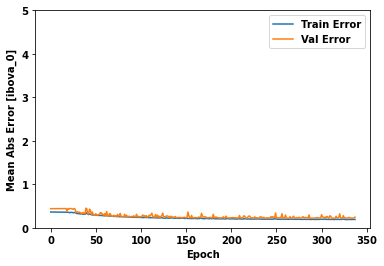

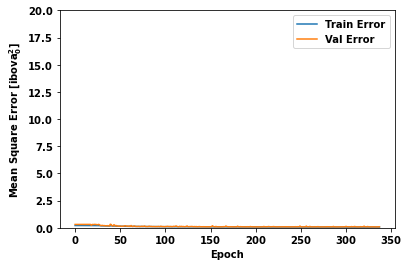

In [57]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ibova_0]')
  plt.plot(hist['epoch'], hist['mae'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ibova_0^2$]')
  plt.plot(hist['epoch'], hist['mse'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Epoch 1/500
36/36 [==============================] - 1s 27ms/step - loss: 58.8478 - mae: 6.1936 - mse: 58.8478 - val_loss: 23.1599 - val_mae: 4.7572 - val_mse: 23.1599
Epoch 2/500
36/36 [==============================] - 0s 2ms/step - loss: 1.2626 - mae: 0.7933 - mse: 1.2626 - val_loss: 1.0379 - val_mae: 0.8271 - val_mse: 1.0379
Epoch 3/500
36/36 [==============================] - 0s 2ms/step - loss: 0.3443 - mae: 0.4628 - mse: 0.3443 - val_loss: 0.4313 - val_mae: 0.5163 - val_mse: 0.4313
Epoch 4/500
36/36 [==============================] - 0s 2ms/step - loss: 0.2889 - mae: 0.4207 - mse: 0.2889 - val_loss: 0.4269 - val_mae: 0.5138 - val_mse: 0.4269
Epoch 5/500
36/36 [==============================] - 0s 2ms/step - loss: 0.2792 - mae: 0.4130 - mse: 0.2792 - val_loss: 0.4189 - val_mae: 0.5078 - val_mse: 0.4189
Epoch 6/500
36/36 [==============================] - 0s 2ms/step - loss: 0.2705 - mae: 0.4064 - mse: 0.2705 - val_loss: 0.4103 - val_mae: 0.5037 - val_mse: 0.4103
Epoch 7/500
36/36

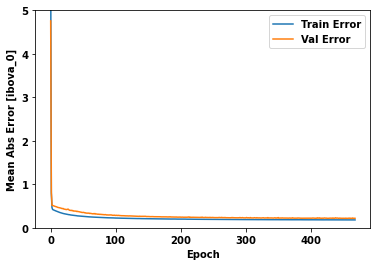

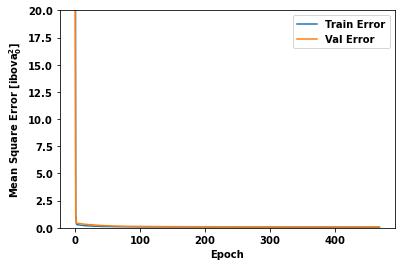

In [58]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=25, mode='min' ,restore_best_weights=True)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop, tensorboard_callback])

# Mudar os dados de validação

plot_history(history)

In [59]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print(f"Testing set Mean Abs Error: {mse:5.2f} ibova_0")

15/15 - 0s - loss: 0.1038 - mae: 0.2167 - mse: 0.1038
Testing set Mean Abs Error:  0.10 ibova_0


# Realizando as previsões

In [60]:
test_predictions = model.predict(test_dataset).flatten()

# Avaliando as previsões:

In [61]:
def show_test_labels():
	# Imprimindo valores reais
	plt.plot(test_labels, color ='r', label='ibova_REAL')
	plt.xlabel("Dates")
	plt.ylabel("Variation ROC")
	plt.title("ibova_REAL")
	plt.legend()

def show_model_predictions():
	# Imprimindo previsoes
	plt.plot(test_predictions, color ='g', label='predictions_MODEL')
	plt.xlabel("Dates")
	plt.ylabel("Variation ROC")
	plt.title("predictions_MODEL")
	plt.legend()

def show_compare_graph():
	# Predictt X Real values
	plt.plot(test_labels, color ='r', label='ibova_REAL')
	plt.plot(test_predictions, color ='g', label='predictions_MODEL')
	plt.xlabel("Dates")
	plt.ylabel("Variation ROC")
	plt.title("Predict X Real values")
	plt.legend()
	plt.show()

def show_true_predict_values():
	plt.figure(figsize=(24,4))
	plt.scatter(test_labels, test_predictions)
	plt.xlabel('True Values [ibova_0]')
	plt.ylabel('Predictions [ibova_0]')
	plt.axis('equal')
	plt.axis('square')
	plt.xlim([0,plt.xlim()[1]])
	plt.ylim([0,plt.ylim()[1]])
	_ = plt.plot([-100, 100], [-100, 100])

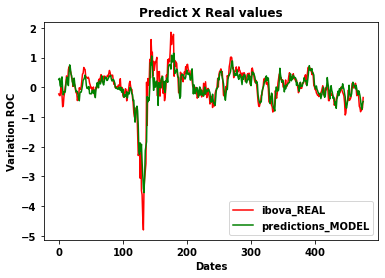

In [64]:
show_compare_graph()

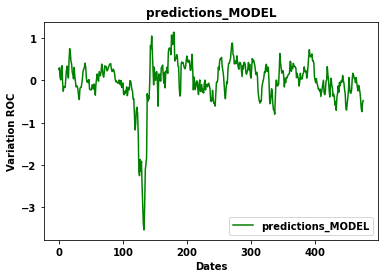

In [63]:
show_model_predictions()

In [62]:
# Analisando Medias:

print(f'Massa de predição: {test_predictions.mean()}')
print(f'Massa inicial: {ibova_test.mean()}')
print(f'Diferenças das médias: {ibova_test.mean() - test_predictions.mean()}')

# Add o RM_MSE medio

Massa de predição: -0.013750568963587284


NameError: name 'ibova_test' is not defined

In [ ]:
# test_dataset